# PhD Student Mental Health Project

## Overview

This notebook contains analysis of survey data conducted by Shift Learning on PhD students. The project uses multiple machine learning models such as logistic regression, decision trees and naive bayes to draw insights into what risk factors contribute to mental health problems in PhD students and make recommendations on how to improve. 

## Business Problem

PhD students are at high risk of mental health issues and have a high suicide rate. This project aims to help academia understand the risk factors in order to systematically improve student’s overall mental health. This project also makes recommendations on how to set up preventative measures for mental health issues among students.

#### End Users:
- Universities, research facilities, school mental health counselors

#### True Business Problem:

- Understand risk factors that contributes to PhD students needing help for anxiety and depression.


#### Context:
- False positive: predict that a student need help for anxiety/depression when they don't 
    - Outcome: trouble and disturbance to the student
- False negative: predict that a student doesn't need help for anxiety/depression when they actually do
    - Outcome: student not getting the help that they need

#### Model Evaluation

We will be focusing on recall because we want to minimize false negative. 

## Data Understanding

The data is aggregated by surveying and interviewing 6,320 current PhD students all over the world in 2019. There are around 60 questions about their personal information and their opinions and concerns about their PhD program.
Important questions include age, country of origin, country of study, whether/by whom they were bullied, whether/reason they need to work outside of their program, whether/which kind of discrimination the student faced, their career expectations, worries about the program/their future, etc.

We are modeling on the assumption that if students need help with anxiety and/or depression, they would ask for it. 

### EDA

In [1]:
import pandas as pd

In [2]:
# load dataframe
df=pd.read_csv('data.csv',dtype='str')

In [3]:
df

,ID.format,ID.completed,ID.language,ID.site,ID.date,ID.start,ID.endDate,ID.end,ID.time,Q1,...,Q59:4,Q59:5,Q59.a,Q60,Q61,Q62,Q63,Q64,Q65.a,Q65.b
0,The published format which was employed,Case completed in Snap Interviewer,What language would you like to complete the s...,Questionnaire location,Date of interview,Time interview started,Completion date of interview,Time interview ended,Duration of interview,"Which, if any, of the following degrees are yo...",...,Do you have any caring responsibilities?,Do you have any caring responsibilities?,"If other, please specify",Thank you for taking part in the survey. Are t...,Would you like to be entered into the prize dr...,Nature may want to contact you again to ask fo...,Springer Nature is keen to update PhD students...,Shift Learning carry out paid research in the ...,Name:,Email address:
1,SNAP 2015 SHIFT,completed,Spanish,NaN,06/14/2019,16:46:41,06/14/2019,17:36:11,49.5,Doctorate degree (PhD/DPhil/MD),...,NaN,NaN,NaN,Felicidades por esta encuesta. Pienso que se h...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",1,NaN
2,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:10:02,06/14/2019,17:38:25,28.38,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",2,NaN
3,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:15:21,06/14/2019,17:39:13,23.87,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,3,NaN
4,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:28,06/14/2019,17:46:58,55.5,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:46,06/14/2019,17:07:47,16.02,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,9835,NaN
6809,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:54:50,06/14/2019,17:08:17,13.45,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9836,NaN
6810,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:58:30,06/14/2019,17:19:23,20.88,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,No,NaN,NaN,9837,NaN
6811,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,15:10:17,06/14/2019,17:21:02,130.75,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9838,NaN


The first row is the questions.

In [4]:
# check the size of the dataset
df.shape

(6813, 274)

The dataset has 6812 data points and 274 columns. There are a lot of columns so our main goal is to clean it up.

In [5]:
# check column names
list(df.columns)

['ID.format',
 'ID.completed',
 'ID.language',
 'ID.site',
 'ID.date',
 'ID.start',
 'ID.endDate',
 'ID.end',
 'ID.time',
 'Q1',
 'Q1.a',
 'Q2',
 'Q3',
 'Q3.a',
 'Q4',
 'Q5',
 'Q6',
 'Q6.a',
 'Q7',
 'Q7.a',
 'Q8',
 'Q8.a',
 'Q9',
 'Q9.a',
 'Q10',
 'Q10.a',
 'Q11',
 'Q11.a',
 'Q12:1',
 'Q12:2',
 'Q12:3',
 'Q12:4',
 'Q12:5',
 'Q12:6',
 'Q12:7',
 'Q12:8',
 'Q12:9',
 'Q12:10',
 'Q12:11',
 'Q12.a',
 'Q13',
 'Q14',
 'Q14.a',
 'Q15.a',
 'Q15.b',
 'Q15.c',
 'Q15.d',
 'Q15.e',
 'Q15.f',
 'Q15.g',
 'Q15.h',
 'Q15.i',
 'Q15.j',
 'Q15.k',
 'Q15.l',
 'Q15.m',
 'Q15.n',
 'Q16',
 'Q17',
 'Q17.a',
 'Q18.a',
 'Q19.a',
 'Q20',
 'Q21.a',
 'Q21.b',
 'Q21.c',
 'Q21.d',
 'Q21.e',
 'Q21.f',
 'Q21.g',
 'Q21.h',
 'Q21.i',
 'Q22.a',
 'Q22.b',
 'Q22.c',
 'Q22.d',
 'Q22.e',
 'Q22.f',
 'Q22.g',
 'Q22.h',
 'Q22.i',
 'Q23',
 'Q24',
 'Q25',
 'Q25.a',
 'Q26',
 'Q27.a',
 'Q27.b',
 'Q27.c',
 'Q27.d',
 'Q27.e',
 'Q27.f',
 'Q28',
 'Q29',
 'Q29.a',
 'Q30.a',
 'Q30.b',
 'Q30.c',
 'Q30.d',
 'Q30.e',
 'Q30.f',
 'Q31',
 'Q32:1

Questions start from the 10th column.

In [6]:
# print out a list of the questions
question_list=list(df.columns)[9:]
for q in question_list:
    print('********')
    print(q)
    print(df[q][0])

********
Q1
Which, if any, of the following degrees are you currently studying for?
********
Q1.a
If other, please specify
********
Q2
Hidden
********
Q3
Which was the most important reason you decided to enrol in a PhD programme?
********
Q3.a
If other, please specify
********
Q4
Are you studying in the country you grew up in?   
********
Q5
Where do you currently live?
********
Q6
Which region in Asia?
********
Q6.a
If other, please specify
********
Q7
Which country in Australasia?
********
Q7.a
If other, please specify
********
Q8
Which country in Africa?
********
Q8.a
If other, please specify
********
Q9
Which country in Europe?
********
Q9.a
If other, please specify
********
Q10
Which country in North or Central America?
********
Q10.a
If other, please specify
********
Q11
Which country in South America?
********
Q11.a
If other, please specify
********
Q12:1
What prompted you to study outside your country of upbringing? 
********
Q12:2
What prompted you to study outside your count

#### Target

Our target column is Q28

In [7]:
# check values for target
df['Q28'].value_counts()

No                                                                          4083
Yes                                                                         2429
Prefer not to say                                                            292
Have you ever sought help for anxiety or depression caused by PhD study?       1
Name: Q28, dtype: int64

In [8]:
df['Q28'].value_counts(normalize=True)

No                                                                          0.600000
Yes                                                                         0.356943
Prefer not to say                                                           0.042910
Have you ever sought help for anxiety or depression caused by PhD study?    0.000147
Name: Q28, dtype: float64

There are 4083 Nos and 2429 Yeses. There's a little bit of class imbalance, but not too bad.

In [9]:
# check null values
df['Q28'].isna().sum()

8

There are not many "prefer not to say"s or null values, so we can safely drop them.

In [10]:
df=df.dropna(subset=['Q28'])
df

,ID.format,ID.completed,ID.language,ID.site,ID.date,ID.start,ID.endDate,ID.end,ID.time,Q1,...,Q59:4,Q59:5,Q59.a,Q60,Q61,Q62,Q63,Q64,Q65.a,Q65.b
0,The published format which was employed,Case completed in Snap Interviewer,What language would you like to complete the s...,Questionnaire location,Date of interview,Time interview started,Completion date of interview,Time interview ended,Duration of interview,"Which, if any, of the following degrees are yo...",...,Do you have any caring responsibilities?,Do you have any caring responsibilities?,"If other, please specify",Thank you for taking part in the survey. Are t...,Would you like to be entered into the prize dr...,Nature may want to contact you again to ask fo...,Springer Nature is keen to update PhD students...,Shift Learning carry out paid research in the ...,Name:,Email address:
1,SNAP 2015 SHIFT,completed,Spanish,NaN,06/14/2019,16:46:41,06/14/2019,17:36:11,49.5,Doctorate degree (PhD/DPhil/MD),...,NaN,NaN,NaN,Felicidades por esta encuesta. Pienso que se h...,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",1,NaN
2,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:10:02,06/14/2019,17:38:25,28.38,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",2,NaN
3,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,17:15:21,06/14/2019,17:39:13,23.87,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,3,NaN
4,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:28,06/14/2019,17:46:58,55.5,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6808,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:51:46,06/14/2019,17:07:47,16.02,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,NaN,NaN,9835,NaN
6809,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:54:50,06/14/2019,17:08:17,13.45,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9836,NaN
6810,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,16:58:30,06/14/2019,17:19:23,20.88,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,No,NaN,NaN,9837,NaN
6811,SNAP 2015 SHIFT,completed,English,NaN,06/14/2019,15:10:17,06/14/2019,17:21:02,130.75,Doctorate degree (PhD/DPhil/MD),...,No,NaN,NaN,NaN,Yes,Yes,"Yes, I would like Nature Careers to contact me...","Yes, I would like to join the Shift Learning r...",9838,NaN


In [11]:
# check if those rows are sucessfully dropped
df['Q28'].value_counts()

No                                                                          4083
Yes                                                                         2429
Prefer not to say                                                            292
Have you ever sought help for anxiety or depression caused by PhD study?       1
Name: Q28, dtype: int64

In [12]:
# drop "Prefer not to say"s
df=df[df['Q28']!='Prefer not to say']

In [13]:
# check if those rows are sucessfully dropped 
df['Q28'].value_counts()

No                                                                          4083
Yes                                                                         2429
Have you ever sought help for anxiety or depression caused by PhD study?       1
Name: Q28, dtype: int64

In [14]:
dict_target={'Yes': 1, 'No': 0}

In [15]:
df['Q28']=df['Q28'].map(dict_target)

<ipython-input-15-7a5e2d789d2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q28']=df['Q28'].map(dict_target)


In [16]:
df['Q28'].dtype

dtype('float64')

#### Features

In [17]:
def info(label):
    '''
    input string of column name
    output comprehensive analysis of the column
    '''
    print(f'column name: {label}')
    print('     ')
    print(f'Question: {df[label][0]}')
    print('     ')
    print(f'number of null values: {df[label].isna().sum()}')
    print('     ')
    print('Value Count:')
    
    print(df[label].value_counts())

In [18]:
# check Q1
info('Q1')

column name: Q1
     
Question: Which, if any, of the following degrees are you currently studying for?
     
number of null values: 0
     
Value Count:
Doctorate degree (PhD/DPhil/MD)                                            6294
Dual doctorate degree (MD-PhD, PhD-PhD or other combination)                218
Which, if any, of the following degrees are you currently studying for?       1
Name: Q1, dtype: int64


In [19]:
dict_Q1={'Doctorate degree (PhD/DPhil/MD)': 0, 
         'Dual doctorate degree (MD-PhD, PhD-PhD or other combination)': 1, 
         'Which, if any, of the following degrees are you currently studying for?':'dual_degree'}

In [20]:
df['Q1']=df['Q1'].map(dict_Q1)

<ipython-input-20-53e31f3f75ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q1']=df['Q1'].map(dict_Q1)


In [21]:
df['Q1'].value_counts()

0              6294
1               218
dual_degree       1
Name: Q1, dtype: int64

In [22]:
info('Q4')

column name: Q4
     
Question: Are you studying in the country you grew up in?   
     
number of null values: 0
     
Value Count:
Yes                                                   4153
 No                                                   2359
Are you studying in the country you grew up in?          1
Name: Q4, dtype: int64


In [23]:
dict_Q4={'Yes':1, ' No':0, 'Are you studying in the country you grew up in? \xa0 ': 'home country'}

In [24]:
df['Q4']=df['Q4'].map(dict_Q4)

<ipython-input-24-80b37a29571b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q4']=df['Q4'].map(dict_Q4)


In [25]:
df['Q4'].value_counts()

1               4153
0               2359
home country       1
Name: Q4, dtype: int64

In [26]:
info('Q13')

column name: Q13
     
Question: Do you have a job alongside your studies?
     
number of null values: 0
     
Value Count:
No                                           5249
Yes                                          1263
Do you have a job alongside your studies?       1
Name: Q13, dtype: int64


In [27]:
df['Q13'].value_counts()

No                                           5249
Yes                                          1263
Do you have a job alongside your studies?       1
Name: Q13, dtype: int64

In [28]:
df["Q13"][21]

'Yes '

In [29]:
dict_Q13={'Yes ':1, 'No':0, 'Do you have a job alongside your studies?': 'job'}

In [30]:
df['Q13']=df['Q13'].map(dict_Q13)

<ipython-input-30-aeb4f6ca4191>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q13']=df['Q13'].map(dict_Q13)


In [31]:
info('Q31')

column name: Q31
     
Question: Do you feel that you have experienced bullying in your PhD program?
     
number of null values: 7
     
Value Count:
No                                                                     4902
Yes                                                                    1388
Prefer not to say                                                       215
Do you feel that you have experienced bullying in your PhD program?       1
Name: Q31, dtype: int64


In [32]:
dict_Q31={'Yes':1, 'No': 0, 'Prefer not to say': 2, 'Do you feel that you have experienced bullying in your PhD program?': 'bullying'}

In [33]:
df['Q31']=df['Q31'].map(dict_Q31)

<ipython-input-33-9b6da20be755>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q31']=df['Q31'].map(dict_Q31)


In [34]:
info('Q34')

column name: Q34
     
Question: Do you feel that you have experienced discrimination or harassment in your PhD program?
     
number of null values: 24
     
Value Count:
No                                                                                         4937
Yes                                                                                        1334
Prefer not to say                                                                           217
Do you feel that you have experienced discrimination or harassment in your PhD program?       1
Name: Q34, dtype: int64


In [35]:
dict_Q34={'Yes':1, 'No': 0, 'Prefer not to say': 2, 'Do you feel that you have experienced discrimination or harassment in your PhD program?': 'discrimination/harrassment'}

In [36]:
df['Q34']=df['Q34'].map(dict_Q34)

<ipython-input-36-d297d21c6dae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q34']=df['Q34'].map(dict_Q34)


In [37]:
info('Q19.a')

column name: Q19.a
     
Question: How satisfied are you with your PhD experience?
     
number of null values: 0
     
Value Count:
6                                                  2085
5                                                  1908
4 = Neither satisfied nor dissatisfied              717
3                                                   659
7 = Extremely satisfied                             592
2                                                   360
1 = Not at all satisfied                            191
How satisfied are you with your PhD experience?       1
Name: Q19.a, dtype: int64


Satisfaction is on a scale of 1 to 7, not at all satisfied to extremely satisfied. So the values just need to be reduced to numbers. 

In [38]:
df['Q19.a'][1:]=df['Q19.a'][1:].map(lambda x:int(x[0]))

<ipython-input-38-a6aa1b63e538>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q19.a'][1:]=df['Q19.a'][1:].map(lambda x:int(x[0]))
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:1043: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [39]:
df['Q19.a'][0]='satisfaction'

<ipython-input-39-946e16614388>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q19.a'][0]='satisfaction'


In [40]:
df['Q19.a'].value_counts()

6               2085
5               1908
4                717
3                659
7                592
2                360
1                191
satisfaction       1
Name: Q19.a, dtype: int64

In [41]:
info('Q24')

column name: Q24
     
Question: On average, how many hours a week do you typically spend on your PhD programme?
     
number of null values: 0
     
Value Count:
41-50 hours                                                                        1785
51-60 hours                                                                        1609
31-40 hours                                                                         783
61-70 hours                                                                         774
71-80 hours                                                                         425
More than 80 hours                                                                  328
Less than 11 hours                                                                  287
21-30 hours                                                                         274
11-20 hours                                                                         247
On average, how many hours a week do you typi

For this column, we can just take the middle of the range and cap it at 81 hours for simplicity. 

In [42]:
dict_Q24={'41-50 hours': 45, 
          '51-60 hours': 55, 
          '31-40 hours': 35, 
          '61-70 hours': 65, 
          '71-80 hours': 75, 
          'More than 80 hours':81, 
          'Less than 11 hours': 5, 
          '21-30 hours': 25, 
          '11-20 hours': 15, 
          'On average, how many hours a week do you typically spend on your PhD programme?': 'hours_worked'}

In [43]:
df['Q24']=df['Q24'].map(dict_Q24)

<ipython-input-43-894a6e5e1440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q24']=df['Q24'].map(dict_Q24)


In [44]:
df['Q24'].value_counts()

45              1785
55              1609
35               783
65               774
75               425
81               328
5                287
25               274
15               247
hours_worked       1
Name: Q24, dtype: int64

In [45]:
info('Q57')

column name: Q57
     
Question: Are you…
     
number of null values: 0
     
Value Count:
Female (including trans female)    3298
Male (including trans male)        3149
Prefer not to say                    35
Gender queer / Non binary            30
Are you…                              1
Name: Q57, dtype: int64


In [46]:
dict_Q57={'Female (including trans female)':0, 'Male (including trans male)': 1, 'Prefer not to say': 2, 'Gender queer / Non binary': 3, 'Are you…': 'gender'}

In [47]:
df['Q57']=df['Q57'].map(dict_Q57)

<ipython-input-47-3a54b3feb3ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q57']=df['Q57'].map(dict_Q57)


In [48]:
df['Q57'].value_counts()

0         3298
1         3149
2           35
3           30
gender       1
Name: Q57, dtype: int64

In [49]:
info('Q56')

column name: Q56
     
Question: What is your age?
     
number of null values: 0
     
Value Count:
25 - 34              5019
18 - 24               789
35 - 44               530
45 - 54               103
55 - 64                35
Prefer not to say      23
65 or over             13
What is your age?       1
Name: Q56, dtype: int64


same with work hours, we can take the average of each option and cap it at 65. For people who prefer not to say, we are going to fill with majority class, which is '25-34'.

In [50]:
dict_Q56={'25 - 34':30, '18 - 24':21, '35 - 44':40, '45 - 54': 50, '55 - 64': 60, 'Prefer not to say': 30, '65 or over': 65, 'What is your age?': 'age'}

In [51]:
df['Q56']=df['Q56'].map(dict_Q56)

<ipython-input-51-1ff88bc95d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q56']=df['Q56'].map(dict_Q56)


In [52]:
df['Q56'].value_counts()

30     5042
21      789
40      530
50      103
60       35
65       13
age       1
Name: Q56, dtype: int64

In [53]:
info('Q42')

column name: Q42
     
Question: After completing your PhD, how long do you think it will take you to find a permanent (non-trainee) position?
     
number of null values: 0
     
Value Count:
Less than a year                                                                                                 1712
1 to 2 years                                                                                                     1258
3 to 6 years                                                                                                     1161
2 to 3 years                                                                                                     1046
Unsure                                                                                                            885
More than 6 years                                                                                                 450
After completing your PhD, how long do you think it will take you to find a permanent (non-trainee)

In [54]:
dict_Q42={'Less than a year': 0.5, '1 to 2 years': 1.5, '3 to 6 years': 4.5, '2 to 3 years': 2.5, 'Unsure': 0, 'More than 6 years': 6, 'After completing your PhD, how long do you think it will take you to find a permanent (non-trainee) position?': 'expected_unemployment_time'}

In [55]:
df['Q42']=df['Q42'].map(dict_Q42)

<ipython-input-55-b40167300b63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q42']=df['Q42'].map(dict_Q42)


In [56]:
df['Q42'].value_counts()

0.5                           1712
1.5                           1258
4.5                           1161
2.5                           1046
0                              885
6                              450
expected_unemployment_time       1
Name: Q42, dtype: int64

In [57]:
simple_df=df[['Q1', 'Q4', 'Q13', 'Q31', 'Q34', 'Q19.a', 'Q24', 'Q57', 'Q56', 'Q42']]

In [58]:
# make the first row column names
simple_df.columns = simple_df.iloc[0] 

# drop the first row
simple_df = simple_df.drop([0])


In [59]:
simple_df

,dual_degree,home country,job,bullying,discrimination/harrassment,satisfaction,hours_worked,gender,age,expected_unemployment_time
1,0,1,0,0,1,5,55,0,30,4.5
2,0,0,0,0,1,6,65,1,30,1.5
3,0,1,0,0,0,6,65,1,30,2.5
5,0,1,0,0,0,3,55,1,30,0.5
6,0,1,0,0,0,4,75,0,30,6
...,...,...,...,...,...,...,...,...,...,...
6806,0,1,0,0,0,6,45,1,21,1.5
6807,0,0,0,0,1,6,75,1,40,4.5
6809,0,1,0,0,0,4,35,0,30,0.5
6811,0,1,0,0,0,6,75,1,30,4.5


In [60]:
simple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6512 entries, 1 to 6812
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   dual_degree                 6512 non-null   object
 1   home country                6512 non-null   object
 2   job                         6512 non-null   object
 3   bullying                    6505 non-null   object
 4   discrimination/harrassment  6488 non-null   object
 5   satisfaction                6512 non-null   object
 6   hours_worked                6512 non-null   object
 7   gender                      6512 non-null   object
 8   age                         6512 non-null   object
 9   expected_unemployment_time  6512 non-null   object
dtypes: object(10)
memory usage: 559.6+ KB


In [61]:
# fill na for 'job', 'bullying', and 'discrimination/harrassment'
# assume all nulls are 'prefer not to say'
simple_df['bullying'].fillna(value=2,inplace=True)
simple_df['discrimination/harrassment'].fillna(value=2,inplace=True)

In [62]:
simple_df=simple_df.astype(float)

### Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X=simple_df
y=df['Q28'][1:]

In [65]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=42)

## Modeling

In [66]:
# imports for modeling and visualization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [67]:
def evaluate(model, X_tr, y_tr, X_te, y_te):
    print('Accuracy Score:')
    print(f'Train - {accuracy_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {accuracy_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Precision Score:')
    print(f'Train - {precision_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {precision_score(y_te, model.predict(X_te))}')
    print('  ')
    print('Recall Score: ')
    print(f'Train - {recall_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {recall_score(y_te, model.predict(X_te))}')
    print('  ')
    print('F1 Score: ')
    print(f'Train - {f1_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {f1_score(y_te, model.predict(X_te))}')
    print('  ')
    print('ROC_AUC: ')
    print(f'Train - {roc_auc_score(y_tr, model.predict(X_tr))}')
    print(f'Test - {roc_auc_score(y_te, model.predict(X_te))}')
    print('  ')
    print('  ')
    print('Confusion matrix for test data')
    return plot_confusion_matrix(model, X_te, y_te, normalize = 'true', include_values=True, display_labels = ["Doesn't Need Help","Need Help"], cmap=plt.cm.Blues)

#### Baseline Understanding: 
predict majority class

In [68]:
y_train.value_counts(normalize=True)

0.0    0.62326
1.0    0.37674
Name: Q28, dtype: float64

If we predict the majority class of not going to need help for anxiety/depression as a result of PhD study (assuming that if people need help, they ask for help), we will be right 62.3% of the time.

#### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

/Users/elylin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
print(lr.score(X_train,y_train))
print(lr.score(X_val,y_val))

0.6696696696696697
0.6584766584766585


In [72]:
lr.coef_

array([[-0.03934577, -0.01917845, -0.10819323,  0.56501058,  0.28529295,
        -0.26134981,  0.00073254, -0.5353653 , -0.0175872 , -0.00121922]])

In [73]:
fi_lr=pd.DataFrame(data=lr.coef_, columns=X_train.columns).T
fi_lr

,0
0,
dual_degree,-0.039346
home country,-0.019178
job,-0.108193
bullying,0.565011
discrimination/harrassment,0.285293
satisfaction,-0.261350
hours_worked,0.000733
gender,-0.535365
age,-0.017587


In [74]:
import numpy as np

In [75]:
np.exp(0.565011)

1.7594671367538721

Accuracy Score:
Train - 0.6696696696696697
Test - 0.6584766584766585
  
Precision Score:
Train - 0.6051980198019802
Test - 0.5650557620817844
  
Recall Score: 
Train - 0.35434782608695653
Test - 0.336283185840708
  
F1 Score: 
Train - 0.4469835466179159
Test - 0.42163661581137307
  
ROC_AUC: 
Train - 0.6073096992896456
Test - 0.5920687710738001
  
  
Confusion matrix for test data


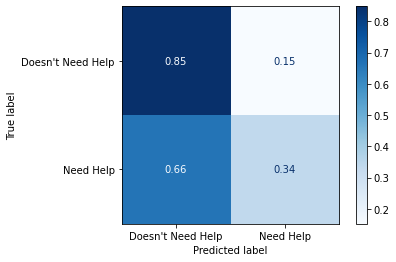

In [76]:
evaluate(lr, X_train, y_train, X_val, y_val)

#### Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dt=DecisionTreeClassifier(max_depth=7,random_state=42)

In [79]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [80]:
print(dt.score(X_train,y_train))
print(dt.score(X_val,y_val))

0.7078897078897078
0.638001638001638


In [81]:
dt.feature_importances_

array([0.01340533, 0.021807  , 0.02815645, 0.27935852, 0.0665856 ,
       0.20235817, 0.13356991, 0.1066362 , 0.04167337, 0.10644945])

In [82]:
fi_dt=pd.DataFrame(data=dt.feature_importances_, index=X_train.columns)
fi_dt

,0
0,
dual_degree,0.013405
home country,0.021807
job,0.028156
bullying,0.279359
discrimination/harrassment,0.066586
satisfaction,0.202358
hours_worked,0.133570
gender,0.106636
age,0.041673


Accuracy Score:
Train - 0.7078897078897078
Test - 0.638001638001638
  
Precision Score:
Train - 0.6802325581395349
Test - 0.5157232704402516
  
Recall Score: 
Train - 0.42391304347826086
Test - 0.36283185840707965
  
F1 Score: 
Train - 0.5223214285714286
Test - 0.42597402597402595
  
ROC_AUC: 
Train - 0.6517287512616884
Test - 0.5812858901918362
  
  
Confusion matrix for test data


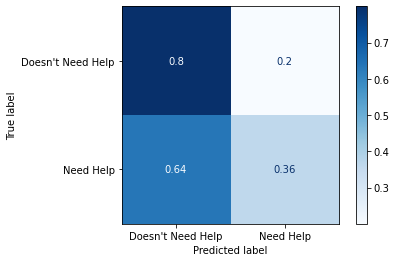

In [83]:
evaluate(dt,X_train,y_train, X_val, y_val)

#### Naive Bayes

In [84]:
from sklearn.naive_bayes import CategoricalNB

In [85]:
nb=CategoricalNB()

In [86]:
nb.fit(X_train,y_train)

CategoricalNB()

In [87]:
print(nb.score(X_train,y_train))
print(nb.score(X_val,y_val))

0.6764946764946765
0.6674856674856675


Accuracy Score:
Train - 0.6764946764946765
Test - 0.6674856674856675
  
Precision Score:
Train - 0.6012461059190031
Test - 0.5672514619883041
  
Recall Score: 
Train - 0.41956521739130437
Test - 0.42920353982300885
  
F1 Score: 
Train - 0.4942381562099872
Test - 0.4886649874055416
  
ROC_AUC: 
Train - 0.6256827401016969
Test - 0.6183729012509062
  
  
Confusion matrix for test data


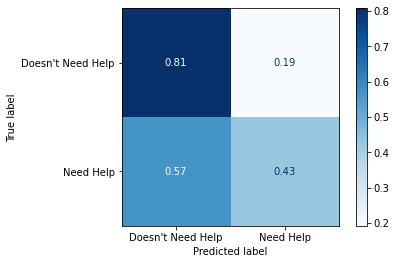

In [88]:
evaluate(nb,X_train,y_train, X_val, y_val)

#### CatBoost

In [89]:
from catboost import CatBoostClassifier

In [90]:
cb=CatBoostClassifier(silent=True)

In [91]:
cb.fit(X_train,y_train)

In [92]:
print(cb.score(X_train,y_train))
print(cb.score(X_val,y_val))

0.7725907725907726
0.6494676494676495


Accuracy Score:
Train - 0.7725907725907726
Test - 0.6494676494676495
  
Precision Score:
Train - 0.782249742002064
Test - 0.5327868852459017
  
Recall Score: 
Train - 0.5492753623188406
Test - 0.4314159292035398
  
F1 Score: 
Train - 0.6453810131971052
Test - 0.47677261613691935
  
ROC_AUC: 
Train - 0.7284265554476375
Test - 0.604524609595268
  
  
Confusion matrix for test data


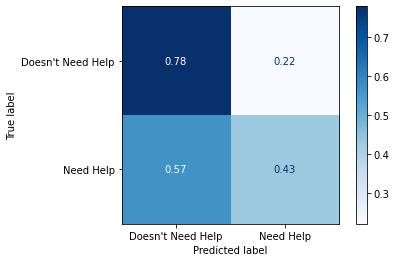

In [93]:
evaluate(cb, X_train, y_train, X_val, y_val)

#### XGBoost

In [94]:
from xgboost import XGBClassifier

In [95]:
xgb=XGBClassifier()

In [96]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
print(xgb.score(X_train,y_train))
print(xgb.score(X_val,y_val))

0.8042588042588042
0.6363636363636364


Accuracy Score:
Train - 0.8042588042588042
Test - 0.6363636363636364
  
Precision Score:
Train - 0.8106841611996252
Test - 0.5104712041884817
  
Recall Score: 
Train - 0.6268115942028986
Test - 0.4314159292035398
  
F1 Score: 
Train - 0.7069881487535759
Test - 0.4676258992805755
  
ROC_AUC: 
Train - 0.7691657620598374
Test - 0.5941214886589871
  
  
Confusion matrix for test data


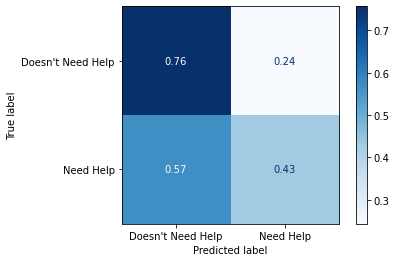

In [98]:
evaluate(xgb,X_train, y_train, X_val, y_val)

## Conclusions

Both our logistic regression and decision tree model indicates that whether a student is bullied in school is the biggest indicator of whether they would need help with anxiety and depression. The other important factors are whether they are harrassed or discriminated against in school and how satisfied they are with the program. 

It's very hard for students to voice their concerns in school because in a lot of cases their bully is their supervisor. By having a model to analyze survey data instead of humans, students can speak their truth without fear of retaliation and still get the help they need.